# Import thư viện vào

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.offline import iplot

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter,StrMethodFormatter
import matplotlib
import scipy as sc
plt.style.use('ggplot')

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
# import thêm hàm make_subplots để tạo ra subplots dễ dàng hơn
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# import thư viện vào

In [ ]:
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1UBmCaLIYavqBlpgiAQ4x6fwsGazKTlT_/view?usp=sharing
link_id = drive.CreateFile({"id":"1FYAT4jg4pET3XOqR5qOk7zCwek6jO38G"})
link_id.GetContentFile("Kasatria Entrance Test v2.xlsx")
df = pd.read_excel("Kasatria Entrance Test v2.xlsx", sheet_name=1)
df

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,Cost,Sales Channel,Country
0,506209075,H,2010-01-01,2010-02-04,Vegetables,7369,154.06,90.93,Online,Central African Republic
1,863776719,C,2010-01-01,2010-02-10,Cereal,9581,205.70,117.11,Online,China
2,695167052,C,2010-01-02,2010-01-22,Cosmetics,4234,437.20,263.33,Offline,Mongolia
3,335552775,M,2010-01-02,2010-02-12,Snacks,6378,152.58,97.44,Offline,Equatorial Guinea
4,907228076,H,2010-01-02,2010-02-21,Clothes,7803,109.28,35.84,Online,Sweden
...,...,...,...,...,...,...,...,...,...,...
9995,701897037,L,2017-07-28,2017-08-15,Beverages,5786,47.45,31.79,Online,Nauru
9996,361056506,L,2017-07-28,2017-08-29,Vegetables,3498,154.06,90.93,Offline,Malaysia
9997,134433019,L,2017-07-28,2017-08-30,Personal Care,572,81.73,56.67,Offline,Tonga
9998,126010453,H,2017-07-28,2017-09-02,Vegetables,8148,154.06,90.93,Online,Ireland


In [ ]:
df_sheet2 = pd.read_excel('Kasatria Entrance Test v2.xlsx', sheet_name=2)
df_sheet2

,Region,Countries
0,Asia,China; Mongolia; Uzbekistan; Laos; Maldives; T...
1,Australia and Oceania,Tonga; Kiribati; Solomon Islands; Palau; New Z...
2,Central America and the Caribbean,Haiti; Dominica; Guatemala; The Bahamas; Grena...
3,Europe,Sweden; Kosovo; Iceland; France; Latvia; Russi...
4,Middle East and North Africa,Oman; Morocco; Iraq; Egypt; Algeria; Saudi Ara...
5,North America,United States of America; Canada; Greenland; M...
6,Sub-Saharan Africa,Central African Republic; Equatorial Guinea; S...


# Thực hiện yêu cầu đề bài

# 1. Total cost, revenue and profit by both region and item type?

In [ ]:
df1= df.copy()

In [ ]:
df1['Cost'].sum()

1888066.3900000001

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        10000 non-null  int64         
 1   Order Priority  10000 non-null  object        
 2   Order Date      10000 non-null  datetime64[ns]
 3   Ship Date       10000 non-null  datetime64[ns]
 4   Item Type       10000 non-null  object        
 5   Units Sold      10000 non-null  int64         
 6   Price           10000 non-null  float64       
 7   Cost            10000 non-null  float64       
 8   Sales Channel   10000 non-null  object        
 9   Country         10000 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 781.4+ KB


In [ ]:
df1['revenue']= df1['Units Sold']* df1['Price']

In [ ]:
column_to_move = df1.pop("revenue")

# insert column with insert(location, column_name, column_value)

df1.insert(7, "revenue", column_to_move)

In [ ]:
df1['revenue'].sum()

13333551314.32

In [ ]:
df1['profit']=  df1['revenue']-df1['Cost']

In [ ]:
column_to_move = df1.pop("profit")

# insert column with insert(location, column_name, column_value)

df1.insert(9, "profit", column_to_move)

In [ ]:
df1

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
0,506209075,H,2010-01-01,2010-02-04,Vegetables,7369,154.06,1135268.14,90.93,1135177.21,Online,Central African Republic
1,863776719,C,2010-01-01,2010-02-10,Cereal,9581,205.70,1970811.70,117.11,1970694.59,Online,China
2,695167052,C,2010-01-02,2010-01-22,Cosmetics,4234,437.20,1851104.80,263.33,1850841.47,Offline,Mongolia
3,335552775,M,2010-01-02,2010-02-12,Snacks,6378,152.58,973155.24,97.44,973057.80,Offline,Equatorial Guinea
4,907228076,H,2010-01-02,2010-02-21,Clothes,7803,109.28,852711.84,35.84,852676.00,Online,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,701897037,L,2017-07-28,2017-08-15,Beverages,5786,47.45,274545.70,31.79,274513.91,Online,Nauru
9996,361056506,L,2017-07-28,2017-08-29,Vegetables,3498,154.06,538901.88,90.93,538810.95,Offline,Malaysia
9997,134433019,L,2017-07-28,2017-08-30,Personal Care,572,81.73,46749.56,56.67,46692.89,Offline,Tonga
9998,126010453,H,2017-07-28,2017-09-02,Vegetables,8148,154.06,1255280.88,90.93,1255189.95,Online,Ireland


In [ ]:
df1['profit'].sum()

13331663247.929998

In [ ]:
details = {
    'cost' :[df1['Cost'].sum()],
    'revenue' : [df1['revenue'].sum()],
    'profit' : [df1['profit'].sum()],
}

# creating a Dataframe object
df_1 = pd.DataFrame(details)

df_1

,cost,revenue,profit
0,1888066.39,1.333355e+10,1.333166e+10


# 2. How many orders of Beverages are there in 2011?

In [ ]:
df1_a= df1[df1['Item Type']==  'Beverages']

In [ ]:
filtered_df = df1_a.loc[(df1_a['Order Date'] >= '2011-01-01')
                     & (df1_a['Order Date'] <= '2011-12-31')]

In [ ]:
filtered_df['Order Date'].count()

109

In [ ]:
df_2011 = df[df['Order Date'].dt.strftime('%Y') == '2011']
df_2011['Item Type'].value_counts().to_frame().reset_index()

,index,Item Type
0,Personal Care,136
1,Office Supplies,126
2,Baby Food,125
3,Household,119
4,Clothes,110
5,Beverages,109
6,Meat,107
7,Cereal,106
8,Snacks,105
9,Vegetables,102


<ipython-input-23-710f7acf23cb>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.




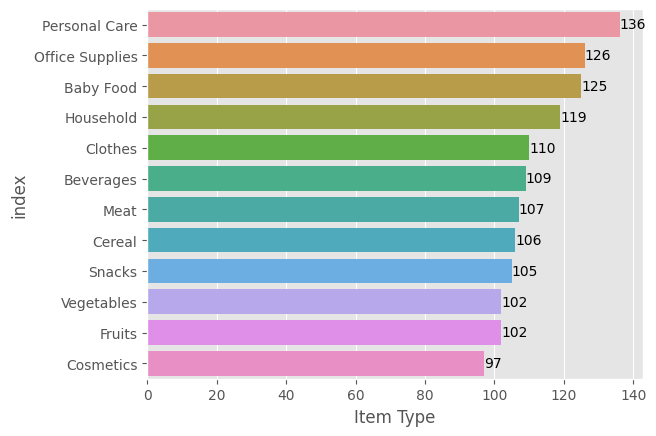

In [ ]:
df_new_2011= df_2011['Item Type'].value_counts().to_frame().reset_index()
# who v/s fare barplot
ax= sns.barplot(y = 'index',
            x = 'Item Type',
            data = df_new_2011,
            estimator = np.median,
            ci = 0)
for i in ax.containers:
    ax.bar_label(i)
# Show the plot
plt.show()

# 3. For each item type, what is the country which gains the max profit?

In [ ]:
df1['Item Type'].unique()

array(['Vegetables', 'Cereal', 'Cosmetics', 'Snacks', 'Clothes',
       'Baby Food', 'Beverages', 'Personal Care', 'Fruits', 'Household',
       'Office Supplies', 'Meat'], dtype=object)

In [ ]:
df1.columns

Index(['Order ID', 'Order Priority', 'Order Date', 'Ship Date', 'Item Type',
       'Units Sold', 'Price', 'revenue', 'Cost', 'profit', 'Sales Channel',
       'Country'],
      dtype='object')

In [ ]:
df_abc= df1.groupby('Item Type')['profit'].max().reset_index()
df_abc

,Item Type,profit
0,Baby Food,2551619.46
1,Beverages,474230.96
2,Cereal,2050711.89
3,Clothes,1091999.20
4,Cosmetics,4370425.07
5,Fruits,93218.44
6,Household,6679524.38
7,Meat,4218535.31
8,Office Supplies,6501806.89
9,Personal Care,816507.76


In [ ]:
df1[df1['profit']== 93218.44]

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
9292,636150729,L,2017-01-24,2017-02-13,Fruits,9992,9.33,93225.36,6.92,93218.44,Online,East Timor


In [ ]:
df['Item Type'].unique()

array(['Vegetables', 'Cereal', 'Cosmetics', 'Snacks', 'Clothes',
       'Baby Food', 'Beverages', 'Personal Care', 'Fruits', 'Household',
       'Office Supplies', 'Meat'], dtype=object)

In [ ]:
df1[df1['profit']  == (df1[(df1['Item Type']== 'Baby Food')]['profit'].max()) ]

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
1846,568801963,M,2011-06-17,2011-07-13,Baby Food,9996,255.28,2551778.88,159.42,2551619.46,Offline,Ireland


In [ ]:
col1= (df1['Item Type'].unique()).tolist()
print(col1)

['Vegetables', 'Cereal', 'Cosmetics', 'Snacks', 'Clothes', 'Baby Food', 'Beverages', 'Personal Care', 'Fruits', 'Household', 'Office Supplies', 'Meat']


In [ ]:
danh_sach=[]
#col2= (df1['Item Type'].unique()).tolist()
col2= (df_abc['Item Type'].unique()).tolist()
for i in col2:
  abc= df1[df1['profit']  == (df1[(df1['Item Type']== i)]['profit'].max()) ]
  danh_sach.append(abc.iloc[0,11])
print(danh_sach)

['Ireland', 'Honduras', 'Palau', 'Croatia', 'Laos', 'East Timor', 'Brunei', 'Norway', 'Poland', 'Saudi Arabia', 'Iceland', 'Sri Lanka']


In [ ]:
danhsach_item= df1['Item Type'].unique().tolist()
danh_sach1=[]
danh_sach2=[]
for i in danhsach_item:
  abc= df1[df1['profit']== (df1[df1['Item Type']== i]['profit'].max())]
  danh_sach1.append(abc.iloc[0,11])
  danh_sach2.append(abc.iloc[0,9])
data= {'Item Type': danhsach_item,
        'profit': danh_sach2,
        'country': danh_sach1
}
df_123= pd.DataFrame(data)
df_123.sort_values(by='Item Type')

,Item Type,profit,country
5,Baby Food,2551619.46,Ireland
6,Beverages,474230.96,Honduras
1,Cereal,2050711.89,Palau
4,Clothes,1091999.20,Croatia
2,Cosmetics,4370425.07,Laos
8,Fruits,93218.44,East Timor
9,Household,6679524.38,Brunei
11,Meat,4218535.31,Norway
10,Office Supplies,6501806.89,Poland
7,Personal Care,816507.76,Saudi Arabia


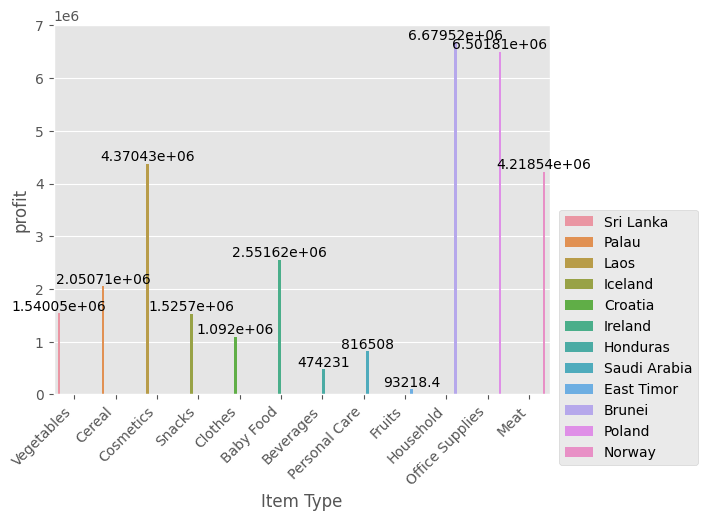

In [ ]:
# who v/s fare barplot
exercise = sns.load_dataset("exercise")
plot = sns.barplot(x="Item Type", y="profit",
                hue="country",
                data=df_123)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
for i in plot.containers:
    plot.bar_label(i)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
plt.show()

# 4. Which region has longest average delivery time in 2016? How long?

In [ ]:
time_2016a = df1.loc[(df1['Order Date'] >= '2016-01-01')
                     & (df1['Order Date'] <= '2016-12-31')]
time_2016a

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
7898,953377091,C,2016-01-01,2016-01-03,Vegetables,4322,154.06,665847.32,90.93,665756.39,Offline,Barbados
7899,743598735,M,2016-01-01,2016-02-18,Cereal,6245,205.70,1284596.50,117.11,1284479.39,Offline,Cameroon
7900,485685670,H,2016-01-02,2016-01-10,Cereal,4038,205.70,830616.60,117.11,830499.49,Offline,Slovakia
7901,319358670,C,2016-01-02,2016-01-16,Meat,4182,421.89,1764343.98,364.69,1763979.29,Online,Myanmar
7902,917994248,M,2016-01-02,2016-01-16,Clothes,3753,109.28,410127.84,35.84,410092.00,Offline,Lithuania
...,...,...,...,...,...,...,...,...,...,...,...,...
9218,678654944,C,2016-12-30,2017-01-09,Vegetables,7934,154.06,1222312.04,90.93,1222221.11,Offline,Nigeria
9219,822114932,L,2016-12-30,2017-01-11,Snacks,932,152.58,142204.56,97.44,142107.12,Offline,Cote d'Ivoire
9220,287869107,C,2016-12-30,2017-01-14,Cereal,5721,205.70,1176809.70,117.11,1176692.59,Online,Uzbekistan
9221,117212808,H,2016-12-31,2017-01-22,Personal Care,4729,81.73,386501.17,56.67,386444.50,Offline,Iran


In [ ]:
time_2016b = df1.loc[(df1['Ship Date'] >= '2016-01-01')
                     & (df1['Ship Date'] <= '2016-12-31')]
time_2016b

,Order ID,Order Priority,Order Date,Ship Date,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
7736,637524878,M,2015-11-22,2016-01-01,Snacks,6634,152.58,1012215.72,97.44,1012118.28,Offline,Moldova
7740,766068351,L,2015-11-23,2016-01-09,Cereal,5504,205.70,1132172.80,117.11,1132055.69,Offline,Greece
7749,680504167,H,2015-11-25,2016-01-14,Cereal,5160,205.70,1061412.00,117.11,1061294.89,Offline,Seychelles
7754,921336066,L,2015-11-26,2016-01-10,Snacks,2671,152.58,407541.18,97.44,407443.74,Offline,Denmark
7757,258074700,H,2015-11-27,2016-01-07,Office Supplies,8894,651.21,5791861.74,524.96,5791336.78,Online,The Gambia
...,...,...,...,...,...,...,...,...,...,...,...,...
9184,391458594,H,2016-12-22,2016-12-29,Vegetables,152,154.06,23417.12,90.93,23326.19,Offline,Portugal
9190,781772363,L,2016-12-24,2016-12-25,Cereal,2670,205.70,549219.00,117.11,549101.89,Online,Tajikistan
9191,690422332,C,2016-12-24,2016-12-31,Vegetables,166,154.06,25573.96,90.93,25483.03,Offline,Nigeria
9195,484265172,H,2016-12-25,2016-12-25,Snacks,3681,152.58,561646.98,97.44,561549.54,Online,New Zealand


In [ ]:
df2= df1.copy()

In [ ]:
df2['C'] = df2['Ship Date'] - df2['Order Date']

In [ ]:
abcd= df2.pop("C")
df2.insert (4, "C", abcd)

In [ ]:
df2.rename(columns = {'C':'Count_days'}, inplace = True)

In [ ]:
df2['Count_days']= df2['Count_days'].astype('str')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        10000 non-null  int64         
 1   Order Priority  10000 non-null  object        
 2   Order Date      10000 non-null  datetime64[ns]
 3   Ship Date       10000 non-null  datetime64[ns]
 4   Count_days      10000 non-null  object        
 5   Item Type       10000 non-null  object        
 6   Units Sold      10000 non-null  int64         
 7   Price           10000 non-null  float64       
 8   revenue         10000 non-null  float64       
 9   Cost            10000 non-null  float64       
 10  profit          10000 non-null  float64       
 11  Sales Channel   10000 non-null  object        
 12  Country         10000 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 1015.8+ KB


In [ ]:
df2['Count_days']= df2['Count_days'].apply(lambda x: x.split(" ")[0])

In [ ]:
df2['Count_days']= df2['Count_days'].astype('int')

In [ ]:
df2

,Order ID,Order Priority,Order Date,Ship Date,Count_days,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,90.93,1135177.21,Online,Central African Republic
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,117.11,1970694.59,Online,China
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,263.33,1850841.47,Offline,Mongolia
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,97.44,973057.80,Offline,Equatorial Guinea
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,35.84,852676.00,Online,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,701897037,L,2017-07-28,2017-08-15,18,Beverages,5786,47.45,274545.70,31.79,274513.91,Online,Nauru
9996,361056506,L,2017-07-28,2017-08-29,32,Vegetables,3498,154.06,538901.88,90.93,538810.95,Offline,Malaysia
9997,134433019,L,2017-07-28,2017-08-30,33,Personal Care,572,81.73,46749.56,56.67,46692.89,Offline,Tonga
9998,126010453,H,2017-07-28,2017-09-02,36,Vegetables,8148,154.06,1255280.88,90.93,1255189.95,Online,Ireland


In [ ]:
# đưa về đúng năm 2016 thôi
df_filtered = df2[(df2['Order Date'].dt.strftime('%Y') == '2016') & (df2['Ship Date'].dt.strftime('%Y') == '2016')]
df_filtered

,Order ID,Order Priority,Order Date,Ship Date,Count_days,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
7898,953377091,C,2016-01-01,2016-01-03,2,Vegetables,4322,154.06,665847.32,90.93,665756.39,Offline,Barbados
7899,743598735,M,2016-01-01,2016-02-18,48,Cereal,6245,205.70,1284596.50,117.11,1284479.39,Offline,Cameroon
7900,485685670,H,2016-01-02,2016-01-10,8,Cereal,4038,205.70,830616.60,117.11,830499.49,Offline,Slovakia
7901,319358670,C,2016-01-02,2016-01-16,14,Meat,4182,421.89,1764343.98,364.69,1763979.29,Online,Myanmar
7902,917994248,M,2016-01-02,2016-01-16,14,Clothes,3753,109.28,410127.84,35.84,410092.00,Offline,Lithuania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9184,391458594,H,2016-12-22,2016-12-29,7,Vegetables,152,154.06,23417.12,90.93,23326.19,Offline,Portugal
9190,781772363,L,2016-12-24,2016-12-25,1,Cereal,2670,205.70,549219.00,117.11,549101.89,Online,Tajikistan
9191,690422332,C,2016-12-24,2016-12-31,7,Vegetables,166,154.06,25573.96,90.93,25483.03,Offline,Nigeria
9195,484265172,H,2016-12-25,2016-12-25,0,Snacks,3681,152.58,561646.98,97.44,561549.54,Online,New Zealand


In [ ]:
df_filtered[df_filtered['Count_days']== df_filtered['Count_days'].max()]

,Order ID,Order Priority,Order Date,Ship Date,Count_days,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country
7940,206756532,H,2016-01-14,2016-03-04,50,Cosmetics,2707,437.20,1183500.40,263.33,1183237.07,Offline,France
7945,131543529,H,2016-01-15,2016-03-05,50,Clothes,5508,109.28,601914.24,35.84,601878.40,Online,Comoros
8042,419056594,L,2016-02-11,2016-04-01,50,Cosmetics,7013,437.20,3066083.60,263.33,3065820.27,Online,Ghana
8064,415947806,L,2016-02-16,2016-04-06,50,Cosmetics,7054,437.20,3084008.80,263.33,3083745.47,Offline,Tanzania
8074,191016900,M,2016-02-19,2016-04-09,50,Baby Food,5000,255.28,1276400.00,159.42,1276240.58,Offline,Mexico
8135,258360087,L,2016-03-06,2016-04-25,50,Vegetables,3346,154.06,515484.76,90.93,515393.83,Online,Kenya
8191,924810922,C,2016-03-19,2016-05-08,50,Office Supplies,958,651.21,623859.18,524.96,623334.22,Online,Ireland
8220,398043525,C,2016-03-24,2016-05-13,50,Baby Food,8779,255.28,2241103.12,159.42,2240943.70,Offline,Bosnia and Herzegovina
8389,525332152,C,2016-05-11,2016-06-30,50,Cereal,6313,205.70,1298584.10,117.11,1298466.99,Online,Macedonia
8403,524624049,H,2016-05-14,2016-07-03,50,Beverages,6769,47.45,321189.05,31.79,321157.26,Offline,Sao Tome and Principe


## Test bài tập

In [ ]:
df_test= df['Country']
df_test= df_test.reset_index()

In [ ]:
df_test.drop('index', axis=1, inplace=True)

In [ ]:
df_test

,Country
0,Central African Republic
1,China
2,Mongolia
3,Equatorial Guinea
4,Sweden
...,...
9995,Nauru
9996,Malaysia
9997,Tonga
9998,Ireland


In [ ]:
list_number= df_test['Country'].tolist()
print(list_number)

['Central African Republic', 'China', 'Mongolia', 'Equatorial Guinea', 'Sweden', 'Iceland', 'Kiribati', 'Kosovo', 'Solomon Islands', 'Sao Tome and Principe', 'Tonga', 'Haiti', 'The Bahamas', 'Dominica', 'France', 'Guatemala', 'Oman', 'Grenada', 'Latvia', 'Russia', 'Morocco', 'Kosovo', 'Antigua and Barbuda ', 'China', 'Iraq', 'Egypt', 'Dominica', 'Costa Rica', 'San Marino', 'Sweden', 'Uzbekistan', 'Dominican Republic', 'Palau', 'Costa Rica', 'Liechtenstein', 'Italy', 'Maldives', 'Laos', 'Lithuania', "Cote d'Ivoire", 'Czech Republic', 'Senegal', 'South Africa', 'The Gambia', 'Algeria', 'Burundi', 'Saudi Arabia', 'Bulgaria', 'Republic of the Congo', 'Saudi Arabia', 'New Zealand', 'Poland', 'Ukraine', 'Taiwan', 'Saint Kitts and Nevis ', 'Yemen', 'Kazakhstan', 'Jamaica', 'Slovenia', 'Sri Lanka', 'Pakistan', 'Djibouti', 'Saint Lucia', 'Czech Republic', 'Madagascar', 'Saudi Arabia', 'Djibouti', 'Lebanon', 'South Korea', 'Federated States of Micronesia', 'Netherlands', 'Netherlands', 'Zimbabwe

In [ ]:
df_sheet2

,Region,Countries
0,Asia,China; Mongolia; Uzbekistan; Laos; Maldives; T...
1,Australia and Oceania,Tonga; Kiribati; Solomon Islands; Palau; New Z...
2,Central America and the Caribbean,Haiti; Dominica; Guatemala; The Bahamas; Grena...
3,Europe,Sweden; Kosovo; Iceland; France; Latvia; Russi...
4,Middle East and North Africa,Oman; Morocco; Iraq; Egypt; Algeria; Saudi Ara...
5,North America,United States of America; Canada; Greenland; M...
6,Sub-Saharan Africa,Central African Republic; Equatorial Guinea; S...


In [ ]:
df_sheet3= df_sheet2.copy()

In [ ]:
df_sheet3= df_sheet3.T
df_sheet3.reset_index(drop=True, inplace=True)
df_sheet3= df_sheet3.rename(columns=df_sheet3.iloc[0])
df_sheet3= df_sheet3.iloc[1:]

In [ ]:
df_sheet3

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
1,China; Mongolia; Uzbekistan; Laos; Maldives; T...,Tonga; Kiribati; Solomon Islands; Palau; New Z...,Haiti; Dominica; Guatemala; The Bahamas; Grena...,Sweden; Kosovo; Iceland; France; Latvia; Russi...,Oman; Morocco; Iraq; Egypt; Algeria; Saudi Ara...,United States of America; Canada; Greenland; M...,Central African Republic; Equatorial Guinea; S...


In [ ]:
# chuyển đổi datarame sang list
dict1 = df_sheet3.to_dict('list')
dict1

{'Asia': ['China; Mongolia; Uzbekistan; Laos; Maldives; Taiwan; Kazakhstan; Sri Lanka; South Korea; Cambodia; Brunei; Turkmenistan; Thailand; Vietnam; Bangladesh; Philippines; Bhutan; Kyrgyzstan; Indonesia; India; North Korea; Singapore; Japan; Tajikistan; Myanmar; Nepal; Malaysia'],
 'Australia and Oceania': ['Tonga; Kiribati; Solomon Islands; Palau; New Zealand; Federated States of Micronesia; East Timor; Samoa ; Australia; Fiji; Marshall Islands; Vanuatu; Tuvalu; Papua New Guinea; Nauru'],
 'Central America and the Caribbean': ['Haiti; Dominica; Guatemala; The Bahamas; Grenada; Antigua and Barbuda ; Costa Rica; Dominican Republic; Saint Kitts and Nevis ; Jamaica; Saint Lucia; Cuba; Nicaragua; El Salvador; Panama; Trinidad and Tobago; Honduras; Belize; Barbados; Saint Vincent and the Grenadines'],
 'Europe': ['Sweden; Kosovo; Iceland; France; Latvia; Russia; San Marino; Liechtenstein; Czech Republic; Lithuania; Italy; Bulgaria; Ukraine; Poland; Slovenia; Netherlands; Romania; Estonia

In [ ]:
x = dict1.get('Asia')
result = [item.split('; ') for item in x]
abc=result[0]

x = dict1.get('Australia and Oceania')
result = [item.split('; ') for item in x]
abc1=result[0]

x = dict1.get('Central America and the Caribbean')
result = [item.split('; ') for item in x]
abc2=result[0]

x = dict1.get('Europe')
result = [item.split('; ') for item in x]
abc3=result[0]

x = dict1.get('Middle East and North Africa')
result = [item.split('; ') for item in x]
abc4=result[0]

x = dict1.get('North America')
result = [item.split('; ') for item in x]
abc5=result[0]

x = dict1.get('Sub-Saharan Africa')
result = [item.split('; ') for item in x]
abc6=result[0]

dict2={'Asia': abc, 'Australia and Oceania': abc1, 'Central America and the Caribbean': abc2 , 'Europe': abc3 , 'Middle East and North Africa' : abc4, 'North America': abc5,'Sub-Saharan Africa': abc6 }
print(dict2)

{'Asia': ['China', 'Mongolia', 'Uzbekistan', 'Laos', 'Maldives', 'Taiwan', 'Kazakhstan', 'Sri Lanka', 'South Korea', 'Cambodia', 'Brunei', 'Turkmenistan', 'Thailand', 'Vietnam', 'Bangladesh', 'Philippines', 'Bhutan', 'Kyrgyzstan', 'Indonesia', 'India', 'North Korea', 'Singapore', 'Japan', 'Tajikistan', 'Myanmar', 'Nepal', 'Malaysia'], 'Australia and Oceania': ['Tonga', 'Kiribati', 'Solomon Islands', 'Palau', 'New Zealand', 'Federated States of Micronesia', 'East Timor', 'Samoa ', 'Australia', 'Fiji', 'Marshall Islands', 'Vanuatu', 'Tuvalu', 'Papua New Guinea', 'Nauru'], 'Central America and the Caribbean': ['Haiti', 'Dominica', 'Guatemala', 'The Bahamas', 'Grenada', 'Antigua and Barbuda ', 'Costa Rica', 'Dominican Republic', 'Saint Kitts and Nevis ', 'Jamaica', 'Saint Lucia', 'Cuba', 'Nicaragua', 'El Salvador', 'Panama', 'Trinidad and Tobago', 'Honduras', 'Belize', 'Barbados', 'Saint Vincent and the Grenadines'], 'Europe': ['Sweden', 'Kosovo', 'Iceland', 'France', 'Latvia', 'Russia', '

In [ ]:
# cách 2
vba=[]
keysList123 = list(dict1.keys())
for i in keysList123 :
  x = dict1.get(i)
  result1 = [item.split('; ') for item in x]
  abc_list=result1[0]
  vba.append(abc_list)
print(vba)

[['China', 'Mongolia', 'Uzbekistan', 'Laos', 'Maldives', 'Taiwan', 'Kazakhstan', 'Sri Lanka', 'South Korea', 'Cambodia', 'Brunei', 'Turkmenistan', 'Thailand', 'Vietnam', 'Bangladesh', 'Philippines', 'Bhutan', 'Kyrgyzstan', 'Indonesia', 'India', 'North Korea', 'Singapore', 'Japan', 'Tajikistan', 'Myanmar', 'Nepal', 'Malaysia'], ['Tonga', 'Kiribati', 'Solomon Islands', 'Palau', 'New Zealand', 'Federated States of Micronesia', 'East Timor', 'Samoa ', 'Australia', 'Fiji', 'Marshall Islands', 'Vanuatu', 'Tuvalu', 'Papua New Guinea', 'Nauru'], ['Haiti', 'Dominica', 'Guatemala', 'The Bahamas', 'Grenada', 'Antigua and Barbuda ', 'Costa Rica', 'Dominican Republic', 'Saint Kitts and Nevis ', 'Jamaica', 'Saint Lucia', 'Cuba', 'Nicaragua', 'El Salvador', 'Panama', 'Trinidad and Tobago', 'Honduras', 'Belize', 'Barbados', 'Saint Vincent and the Grenadines'], ['Sweden', 'Kosovo', 'Iceland', 'France', 'Latvia', 'Russia', 'San Marino', 'Liechtenstein', 'Czech Republic', 'Lithuania', 'Italy', 'Bulgaria'

In [ ]:
# tiếp theo ( cách 2)
d = dict(zip(keysList123,vba))
print(d)

{'Asia': ['China', 'Mongolia', 'Uzbekistan', 'Laos', 'Maldives', 'Taiwan', 'Kazakhstan', 'Sri Lanka', 'South Korea', 'Cambodia', 'Brunei', 'Turkmenistan', 'Thailand', 'Vietnam', 'Bangladesh', 'Philippines', 'Bhutan', 'Kyrgyzstan', 'Indonesia', 'India', 'North Korea', 'Singapore', 'Japan', 'Tajikistan', 'Myanmar', 'Nepal', 'Malaysia'], 'Australia and Oceania': ['Tonga', 'Kiribati', 'Solomon Islands', 'Palau', 'New Zealand', 'Federated States of Micronesia', 'East Timor', 'Samoa ', 'Australia', 'Fiji', 'Marshall Islands', 'Vanuatu', 'Tuvalu', 'Papua New Guinea', 'Nauru'], 'Central America and the Caribbean': ['Haiti', 'Dominica', 'Guatemala', 'The Bahamas', 'Grenada', 'Antigua and Barbuda ', 'Costa Rica', 'Dominican Republic', 'Saint Kitts and Nevis ', 'Jamaica', 'Saint Lucia', 'Cuba', 'Nicaragua', 'El Salvador', 'Panama', 'Trinidad and Tobago', 'Honduras', 'Belize', 'Barbados', 'Saint Vincent and the Grenadines'], 'Europe': ['Sweden', 'Kosovo', 'Iceland', 'France', 'Latvia', 'Russia', '

In [ ]:
# sai
pou=[]
for key, val in dict2.items():
    for i in val:
      for ka in list_number:
        if ka==i:
          pou.append(key)
print(pou)

['Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',

In [ ]:
# đúng
pou=[]
for ka in list_number:
  for key, val in dict2.items():
      for i in val:
          if ka== i:
             pou.append(key)
print(pou)

['Sub-Saharan Africa', 'Asia', 'Asia', 'Sub-Saharan Africa', 'Europe', 'Europe', 'Australia and Oceania', 'Europe', 'Australia and Oceania', 'Sub-Saharan Africa', 'Australia and Oceania', 'Central America and the Caribbean', 'Central America and the Caribbean', 'Central America and the Caribbean', 'Europe', 'Central America and the Caribbean', 'Middle East and North Africa', 'Central America and the Caribbean', 'Europe', 'Europe', 'Middle East and North Africa', 'Europe', 'Central America and the Caribbean', 'Asia', 'Middle East and North Africa', 'Middle East and North Africa', 'Central America and the Caribbean', 'Central America and the Caribbean', 'Europe', 'Europe', 'Asia', 'Central America and the Caribbean', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Europe', 'Asia', 'Asia', 'Europe', 'Sub-Saharan Africa', 'Europe', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Middle East and North Africa', 'Sub-Saharan Africa', 'Middle East an

In [ ]:
list_number= df_test['Country'].tolist()
print(list_number)

['Central African Republic', 'China', 'Mongolia', 'Equatorial Guinea', 'Sweden', 'Iceland', 'Kiribati', 'Kosovo', 'Solomon Islands', 'Sao Tome and Principe', 'Tonga', 'Haiti', 'The Bahamas', 'Dominica', 'France', 'Guatemala', 'Oman', 'Grenada', 'Latvia', 'Russia', 'Morocco', 'Kosovo', 'Antigua and Barbuda ', 'China', 'Iraq', 'Egypt', 'Dominica', 'Costa Rica', 'San Marino', 'Sweden', 'Uzbekistan', 'Dominican Republic', 'Palau', 'Costa Rica', 'Liechtenstein', 'Italy', 'Maldives', 'Laos', 'Lithuania', "Cote d'Ivoire", 'Czech Republic', 'Senegal', 'South Africa', 'The Gambia', 'Algeria', 'Burundi', 'Saudi Arabia', 'Bulgaria', 'Republic of the Congo', 'Saudi Arabia', 'New Zealand', 'Poland', 'Ukraine', 'Taiwan', 'Saint Kitts and Nevis ', 'Yemen', 'Kazakhstan', 'Jamaica', 'Slovenia', 'Sri Lanka', 'Pakistan', 'Djibouti', 'Saint Lucia', 'Czech Republic', 'Madagascar', 'Saudi Arabia', 'Djibouti', 'Lebanon', 'South Korea', 'Federated States of Micronesia', 'Netherlands', 'Netherlands', 'Zimbabwe

In [ ]:
df2['Region']= pou
df2

,Order ID,Order Priority,Order Date,Ship Date,Count_days,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country,Region
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,90.93,1135177.21,Online,Central African Republic,Sub-Saharan Africa
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,117.11,1970694.59,Online,China,Asia
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,263.33,1850841.47,Offline,Mongolia,Asia
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,97.44,973057.80,Offline,Equatorial Guinea,Sub-Saharan Africa
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,35.84,852676.00,Online,Sweden,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,701897037,L,2017-07-28,2017-08-15,18,Beverages,5786,47.45,274545.70,31.79,274513.91,Online,Nauru,Australia and Oceania
9996,361056506,L,2017-07-28,2017-08-29,32,Vegetables,3498,154.06,538901.88,90.93,538810.95,Offline,Malaysia,Asia
9997,134433019,L,2017-07-28,2017-08-30,33,Personal Care,572,81.73,46749.56,56.67,46692.89,Offline,Tonga,Australia and Oceania
9998,126010453,H,2017-07-28,2017-09-02,36,Vegetables,8148,154.06,1255280.88,90.93,1255189.95,Online,Ireland,Europe


In [ ]:
df_filtered_ok = df2[(df2['Order Date'].dt.strftime('%Y') == '2016') & (df2['Ship Date'].dt.strftime('%Y') == '2016')]
df_filtered_ok[df_filtered_ok['Count_days']== df_filtered_ok['Count_days'].max()]['Region'].value_counts()

Sub-Saharan Africa              12
Europe                           6
Asia                             4
North America                    1
Australia and Oceania            1
Middle East and North Africa     1
Name: Region, dtype: int64

In [ ]:
df_new_cau4= df_filtered_ok[df_filtered_ok['Count_days']== df_filtered_ok['Count_days'].max()]['Region'].value_counts().to_frame().reset_index()
df_new_cau4.rename(columns={'index': 'Field'}, inplace= True)

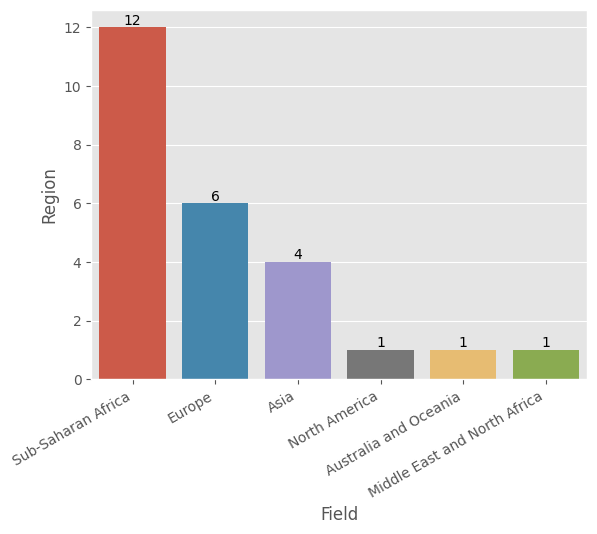

In [ ]:
ax=sns.barplot(x = 'Field',
            y = 'Region',
            data = df_new_cau4,
            estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,
                        horizontalalignment='right')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [ ]:
#y = dict.keys()
z=['Asia', 'Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Middle East and North Africa', 'North America', 'Sub-Saharan Africa']
x1=[]
x = dict1.get('Asia')
print(x)

['China; Mongolia; Uzbekistan; Laos; Maldives; Taiwan; Kazakhstan; Sri Lanka; South Korea; Cambodia; Brunei; Turkmenistan; Thailand; Vietnam; Bangladesh; Philippines; Bhutan; Kyrgyzstan; Indonesia; India; North Korea; Singapore; Japan; Tajikistan; Myanmar; Nepal; Malaysia']


In [ ]:
newList=[]
for k in x:
    newList.append(k.split('; '))
# print(newList)
for l in newList:
  print(l)

['China', 'Mongolia', 'Uzbekistan', 'Laos', 'Maldives', 'Taiwan', 'Kazakhstan', 'Sri Lanka', 'South Korea', 'Cambodia', 'Brunei', 'Turkmenistan', 'Thailand', 'Vietnam', 'Bangladesh', 'Philippines', 'Bhutan', 'Kyrgyzstan', 'Indonesia', 'India', 'North Korea', 'Singapore', 'Japan', 'Tajikistan', 'Myanmar', 'Nepal', 'Malaysia']


# 5. Which item type contributes most profit in Jan?

In [ ]:
# df['Date'] = pd.to_datetime(df['Date']) -- if column is not datetime yet
#df = df[df['Date'].dt.month == 11]

In [ ]:
df_5 = df2[df2['Order Date'].dt.month == 1]
df_5= df_5.groupby(['Item Type'])['profit'].sum().reset_index()
df_5

,Item Type,profit
0,Baby Food,8.894323e+07
1,Beverages,1.393338e+07
2,Cereal,7.607612e+07
3,Clothes,3.396926e+07
4,Cosmetics,1.472307e+08
5,Fruits,3.079416e+06
6,Household,2.428962e+08
7,Meat,1.590862e+08
8,Office Supplies,2.234270e+08
9,Personal Care,3.478963e+07


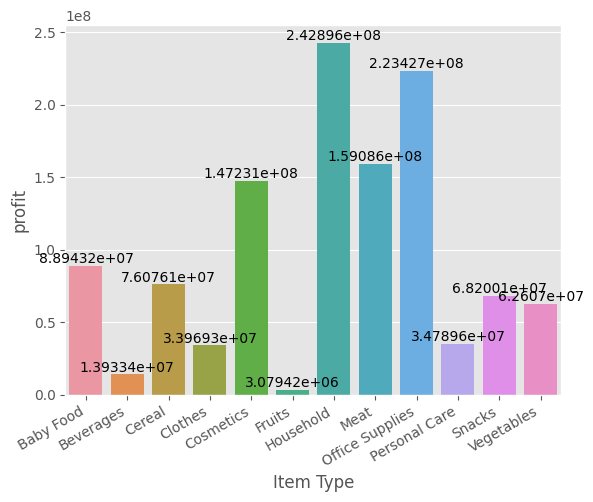

In [ ]:
ax= sns.barplot(x='Item Type', y='profit', data=df_5,estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,
                        horizontalalignment='right')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# 6. What is total profit of top 5 countries which are sorted by Online channel orders?

In [ ]:
df2['Sales Channel'].value_counts()

Online     5061
Offline    4939
Name: Sales Channel, dtype: int64

In [ ]:
df_6= df2[df2['Sales Channel']==  'Online']

In [ ]:
df_6.columns

Index(['Order ID', 'Order Priority', 'Order Date', 'Ship Date', 'Count_days',
       'Item Type', 'Units Sold', 'Price', 'revenue', 'Cost', 'profit',
       'Sales Channel', 'Country', 'Region'],
      dtype='object')

In [ ]:
df_6a= df_6.groupby('Country')['profit'].sum().reset_index()
df_6a.sort_values(by="profit", ascending= False).head(5)

,Country,profit
160,Taiwan,72973983.08
11,Bangladesh,62490495.20
91,Lithuania,61391637.74
68,India,61228908.77
151,South Korea,60598080.85


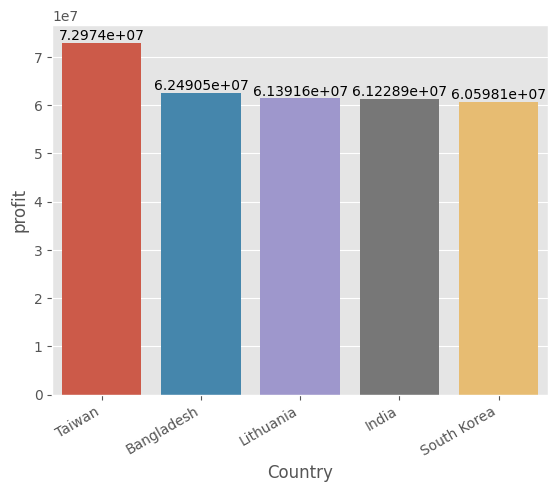

In [ ]:
ax= sns.barplot(x='Country', y= 'profit', data=df_6a.sort_values(by="profit", ascending= False).head(5),estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30,
                        horizontalalignment='right')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# 7. Evaluate business situation. Illustrate your insights by chart. In your opinion, what does the company should improvise?

In [ ]:
df7= df2.copy()
df7

In [ ]:
df7['Month']= df7['Order Date'].dt.strftime('%m')
df7

,Order ID,Order Priority,Order Date,Ship Date,Count_days,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country,Region,Month
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,90.93,1135177.21,Online,Central African Republic,Sub-Saharan Africa,01
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,117.11,1970694.59,Online,China,Asia,01
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,263.33,1850841.47,Offline,Mongolia,Asia,01
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,97.44,973057.80,Offline,Equatorial Guinea,Sub-Saharan Africa,01
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,35.84,852676.00,Online,Sweden,Europe,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,701897037,L,2017-07-28,2017-08-15,18,Beverages,5786,47.45,274545.70,31.79,274513.91,Online,Nauru,Australia and Oceania,07
9996,361056506,L,2017-07-28,2017-08-29,32,Vegetables,3498,154.06,538901.88,90.93,538810.95,Offline,Malaysia,Asia,07
9997,134433019,L,2017-07-28,2017-08-30,33,Personal Care,572,81.73,46749.56,56.67,46692.89,Offline,Tonga,Australia and Oceania,07
9998,126010453,H,2017-07-28,2017-09-02,36,Vegetables,8148,154.06,1255280.88,90.93,1255189.95,Online,Ireland,Europe,07


## Tháng nào có doanh số tốt nhất ?

In [ ]:
df7

,Order ID,Order Priority,Order Date,Ship Date,Count_days,Item Type,Units Sold,Price,revenue,Cost,profit,Sales Channel,Country,Region,Month
0,506209075,H,2010-01-01,2010-02-04,34,Vegetables,7369,154.06,1135268.14,90.93,1135177.21,Online,Central African Republic,Sub-Saharan Africa,01
1,863776719,C,2010-01-01,2010-02-10,40,Cereal,9581,205.70,1970811.70,117.11,1970694.59,Online,China,Asia,01
2,695167052,C,2010-01-02,2010-01-22,20,Cosmetics,4234,437.20,1851104.80,263.33,1850841.47,Offline,Mongolia,Asia,01
3,335552775,M,2010-01-02,2010-02-12,41,Snacks,6378,152.58,973155.24,97.44,973057.80,Offline,Equatorial Guinea,Sub-Saharan Africa,01
4,907228076,H,2010-01-02,2010-02-21,50,Clothes,7803,109.28,852711.84,35.84,852676.00,Online,Sweden,Europe,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,701897037,L,2017-07-28,2017-08-15,18,Beverages,5786,47.45,274545.70,31.79,274513.91,Online,Nauru,Australia and Oceania,07
9996,361056506,L,2017-07-28,2017-08-29,32,Vegetables,3498,154.06,538901.88,90.93,538810.95,Offline,Malaysia,Asia,07
9997,134433019,L,2017-07-28,2017-08-30,33,Personal Care,572,81.73,46749.56,56.67,46692.89,Offline,Tonga,Australia and Oceania,07
9998,126010453,H,2017-07-28,2017-09-02,36,Vegetables,8148,154.06,1255280.88,90.93,1255189.95,Online,Ireland,Europe,07


In [ ]:
df7.columns

Index(['Order ID', 'Order Priority', 'Order Date', 'Ship Date', 'Count_days',
       'Item Type', 'Units Sold', 'Price', 'revenue', 'Cost', 'profit',
       'Sales Channel', 'Country', 'Region', 'Month'],
      dtype='object')

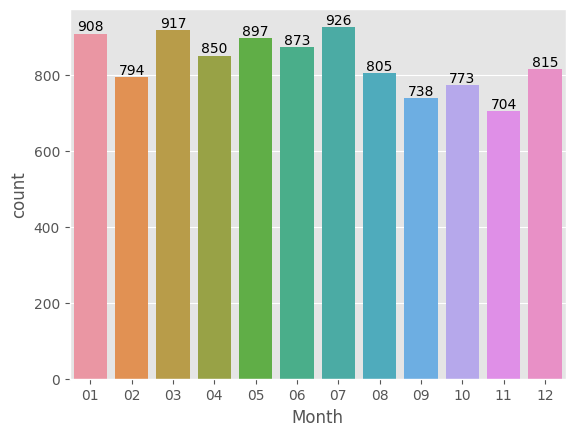

In [ ]:
ax= sns.countplot(x=df7["Month"])
for i in ax.containers:
    ax.bar_label(i)

## Nhận xét
*  Tháng 1,3,7 có đơn đặt hàng nhiều nhất
*  Tháng 9,10,11 có đơn đặt hàng thấp nhất




## Top 5 sản phẩm doanh thu có lợi nhuận cao nhất và top 5 sản phẩm ó doanh thu thấp nhất

In [ ]:
df7.groupby(['Item Type'])['profit'].sum().to_frame().reset_index().sort_values(by=['profit'], ascending= False).head(5)

,Item Type,profit
6,Household,2.897716e+09
8,Office Supplies,2.682717e+09
4,Cosmetics,1.793739e+09
7,Meat,1.681105e+09
0,Baby Food,1.071277e+09


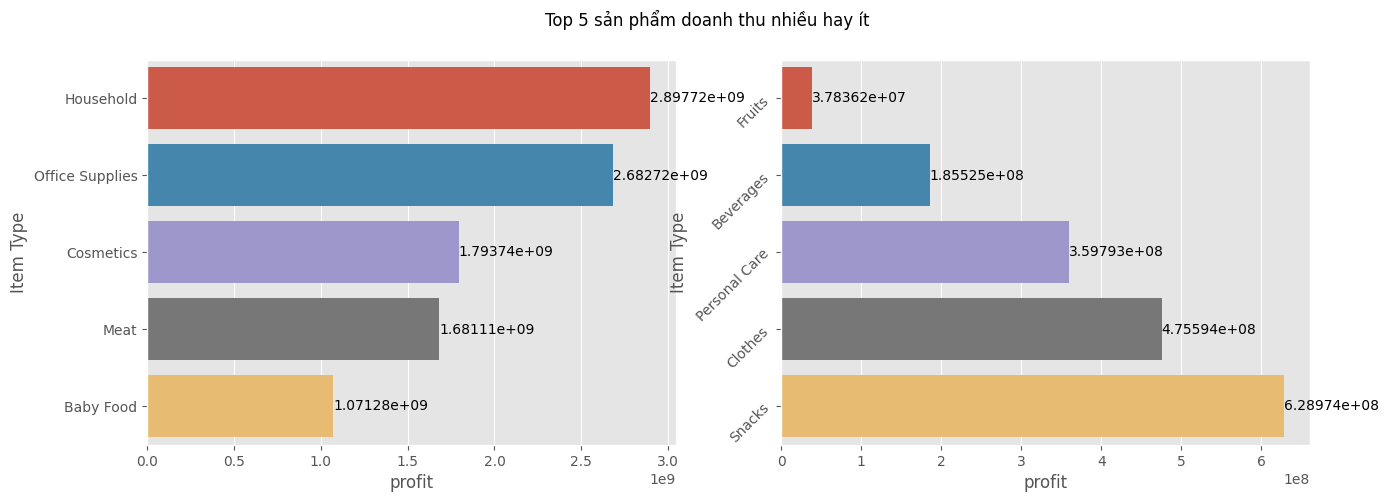

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Top 5 sản phẩm doanh thu nhiều hay ít ')
ax= sns.barplot(ax=axes[0],y = 'Item Type',
            x = 'profit',
            data = df7.groupby(['Item Type'])['profit'].sum().to_frame().reset_index().sort_values(by=['profit'], ascending= False).head(5),
            estimator = np.median
            )
for i in ax.containers:
    ax.bar_label(i)

ax1= sns.barplot(ax=axes[1],y = 'Item Type',
            x = 'profit',
            data = df7.groupby(['Item Type'])['profit'].sum().to_frame().reset_index().sort_values(by=['profit']).head(5),
            estimator = np.median
            )
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=45,
                    horizontalalignment='right')

plt.show()


## Nhận xét
* Top 5 sản phẩm có doanh thu cao nhất: Household, Office Supplies, Cosmetics
* Top 5 sản phẩm có doanh thu thấp nhất: Snacks, Cloths, Personal Care, Beverage, Fruits



## Top 5 sản phẩm có đơn hàng nhiều nhất và Top 5 sản phẩm có đơn hàng ít  nhất

In [ ]:
df7.groupby(['Item Type'])['Order ID'].count().to_frame().reset_index().sort_values(by=['Order ID'], ascending= False).head(5)

,Item Type,Order ID
9,Personal Care,888
6,Household,875
3,Clothes,872
0,Baby Food,842
8,Office Supplies,837


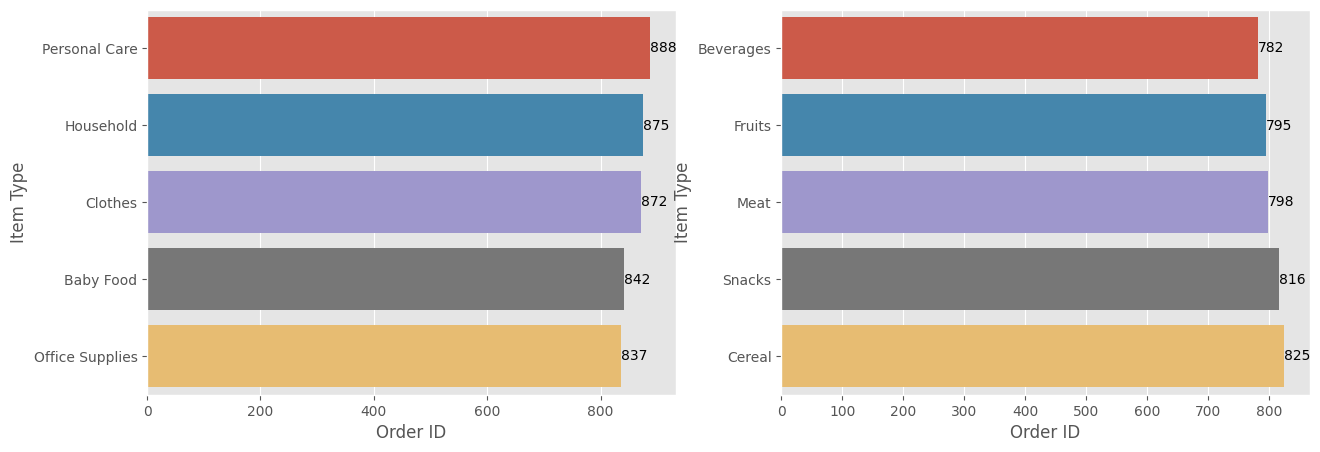

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax= sns.barplot(ax=axes[0],y = 'Item Type',
            x= 'Order ID',
            data = df7.groupby(['Item Type'])['Order ID'].count().to_frame().reset_index().sort_values(by=['Order ID'], ascending= False).head(5),
            estimator = np.median
            )
for i in ax.containers:
    ax.bar_label(i)
ax= sns.barplot(ax=axes[1],y = 'Item Type',
            x= 'Order ID',
            data = df7.groupby(['Item Type'])['Order ID'].count().to_frame().reset_index().sort_values(by=['Order ID']).head(5),
            estimator = np.median
            )
for i in ax.containers:
    ax.bar_label(i)
plt.show()


## Nhận xét
* Top 5 sản phẩm có đơn hàng nhiều nhất: Personal Care, Household, Cloths, Baby Food, Office Supplies
* Top 5 sản phẩm có đơn hàng ít nhất: Cereal, Snacks, Meat, Fruits, Beverages




In [ ]:
# Nhận xét
#Top 5 sản phẩm có đơn hàng nhiều nhất: Personal Care, Household, Cloths, Baby Food, Office Supplies
# Top 5 sản phẩm có đơn hàng ít nhất: Cereal, Snacks, Meat, Fruits, Beverages

In [ ]:
df7.groupby(['Item Type'])['Price'].sum().to_frame().reset_index().sort_values(by=['Price'], ascending= False)

,Item Type,Price
6,Household,584736.25
8,Office Supplies,545062.77
4,Cosmetics,364624.80
7,Meat,336668.22
0,Baby Food,214945.76
2,Cereal,169702.50
11,Vegetables,128794.16
10,Snacks,124505.28
3,Clothes,95292.16
9,Personal Care,72576.24


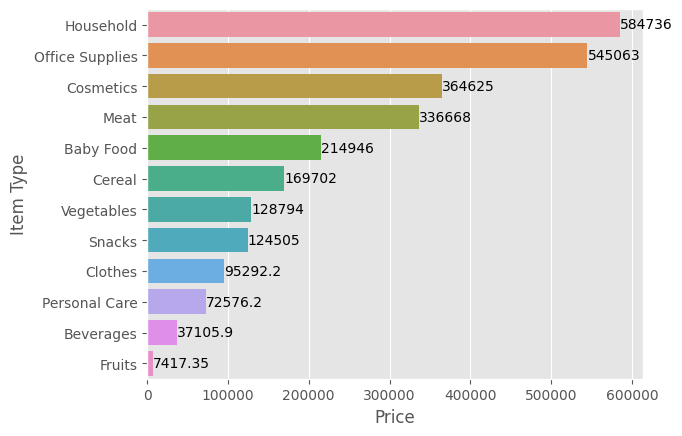

In [ ]:
ax= sns.barplot(y = 'Item Type',
            x= 'Price',
            data = df7.groupby(['Item Type'])['Price'].sum().to_frame().reset_index().sort_values(by=['Price'], ascending= False),
            estimator = np.median
            )
for i in ax.containers:
    ax.bar_label(i)


## Nhận xét và cách cải thiện
*   Personal Care , Cloths có lượng đơn nhiều nhất nhưng Profit lại thấp nhất ( Do giá thành thấp) -> Cần tăng giá bán
* Household là sản phẩm mua có lượng mua nhiều nhất -> sản phẩm bán chạy nhất của công ty
* Office Supplies, Cosmictic, Meat có lượng mua ít nhưng Profit lại lớn ->  tiếp tục phát huy)
* Fruits , Bererage có lượng mua ít và Profit thấp nhất -> Ngừng kinh doanh


